Insurance Premium Prediction

Load and understand the data

In [1]:
# import library and load the dataset
import pandas as pd
df = pd.read_csv('insurance.csv')

In [2]:
# display the first five rows
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
# check the number of rows and columns
df.shape

(1338, 7)

In [4]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# algorithm will accept only numeric values
# all non-numeric to be converted to numeric
# import libraya labelencoded to convert non-numeric to numeric
from sklearn.preprocessing import LabelEncoder
cat_cols = ['sex','smoker','region'] # list of non-numeric columns

# Write a loop to convert all three categorical columns to numeric
for var in cat_cols:
  num = LabelEncoder() # instantiate an object of LabelEncoder
  df[var] = num.fit_transform(df[var].astype('str')) # fit_transform will convert

In [6]:
# display the first five rows to verify
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [7]:
# checck null values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [8]:
# view the statistical summary
df.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,1.515695,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,1.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,3.000000,63770.430000


Define X (features/independent ) and y(target/dependent/labels)

In [9]:
# create features and labels
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
# first five rows of X
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [11]:
# first five rows of y
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [12]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# check the first five rows of X_scaled
X_scaled[:5]

array([[0.02173913, 0.        , 0.32075472, 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 0.47978437, 0.2       , 0.        ,
        0.66666667],
       [0.2173913 , 1.        , 0.45822102, 0.6       , 0.        ,
        0.66666667],
       [0.32608696, 1.        , 0.18059299, 0.        , 0.        ,
        0.33333333],
       [0.30434783, 1.        , 0.34770889, 0.        , 0.        ,
        0.33333333]])

In [14]:
# Split the data into train and test
# import the library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2) # test data will have 20% , train will have 80%

In [15]:
# verify split
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1070, 6)
X_test:  (268, 6)
y_train:  (1070,)
y_test:  (268,)


In [16]:
# Build the model
# import the library
from keras.models import Sequential
from keras.layers import Dense,Input

model = Sequential()

# Input layer
model.add(Dense(12,input_dim=6 , activation= 'relu'))
# hidden layer
model.add(Dense(8, activation= 'relu'))
model.add(Dense(4, activation= 'relu'))
# output layer
model.add(Dense(1, activation= 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compile the model : It is an activity performed after creating the model. It checks for format errors, and defines the loss function and the optimizer to get optimum values of weights and biases. Metrics is also defined.

In [17]:
# compile the model
model.compile(loss='mse',optimizer='adam',metrics=['mse','mae','accuracy'])

Train the model. Fit method will be used to train the model. Epochs the number of times we want to run the entire training to run. Batch, number of rows in one transaction. Validation split : 20% of training data as validation.

In [18]:
history = model.fit(X_train,y_train,epochs=300, batch_size=50, verbose=1, validation_split=0.2)

Epoch 1/300
18/18 [==============================] - 1s 12ms/step - loss: 320086240.0000 - mse: 320086240.0000 - mae: 13269.1768 - accuracy: 0.0000e+00 - val_loss: 329261792.0000 - val_mse: 329261792.0000 - val_mae: 13531.8506 - val_accuracy: 0.0000e+00
Epoch 2/300
18/18 [==============================] - 0s 3ms/step - loss: 320084736.0000 - mse: 320084736.0000 - mae: 13269.1133 - accuracy: 0.0000e+00 - val_loss: 329259840.0000 - val_mse: 329259840.0000 - val_mae: 13531.7686 - val_accuracy: 0.0000e+00
Epoch 3/300
18/18 [==============================] - 0s 3ms/step - loss: 320081792.0000 - mse: 320081792.0000 - mae: 13268.9785 - accuracy: 0.0000e+00 - val_loss: 329254880.0000 - val_mse: 329254880.0000 - val_mae: 13531.5518 - val_accuracy: 0.0000e+00
Epoch 4/300
18/18 [==============================] - 0s 3ms/step - loss: 320074528.0000 - mse: 320074528.0000 - mae: 13268.6738 - accuracy: 0.0000e+00 - val_loss: 329242944.0000 - val_mse: 329242944.0000 - val_mae: 13531.0967 - val_accuracy

Evaluate the model. History Callback :It records the metric for each epoch.This includes loss and accuracy for training and validation set if it is defined. This history is returned from call to fit function.Metrics are stored in a dictionary object.

In [19]:
# List the metris collected in the history.
print(history.history.keys())

dict_keys(['loss', 'mse', 'mae', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_accuracy'])


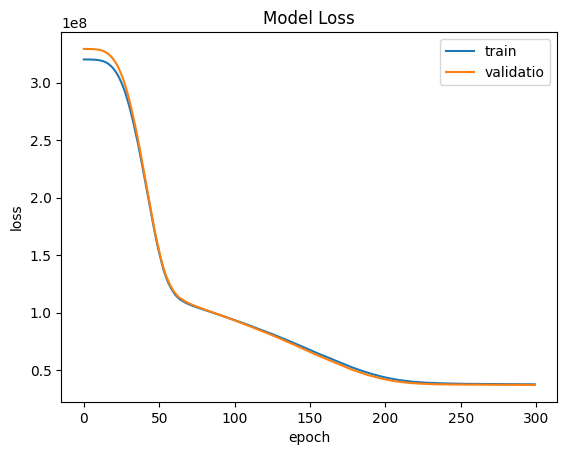

In [20]:
# plot the results
# the speed of converegnce per epoch
# whether my model has already converged
# whether it is over learning.

# import the library
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Model Loss')
plt.legend(['train','validation'], loc='best')
plt.show()


In [21]:
# Predict the results
preds = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


In [33]:
df_pred = pd.DataFrame(preds,columns=['Predicted'])

In [32]:
df_actual = pd.DataFrame(y_test)

In [34]:
df_pred.head()

,Predicted
0,36442.152344
1,28595.527344
2,14161.897461
3,13846.517578
4,14071.695312


In [35]:
df_actual.head()

,expenses
265,46151.12
1306,16115.30
1258,30063.58
308,11944.59
722,12979.36


In [37]:
#Mean squared error and R-squared for test data
# import the library
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(y_test,preds)

36429283.59739677

In [38]:
r2_score(y_test,preds)

0.7647165153513082

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,preds)

4020.217258373659